# Analyse en composantes principales

In [1]:
from plydata import *
import pandas as pd
url = "D:/Bureau/PythonProject/packages/scientisttools/scientisttools/data"
decathlon = pd.read_excel(url+"/decathlon2.xlsx",header=0,sheet_name=0,index_col=0)
decathlon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, SEBRLE to Drews
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X100m         27 non-null     float64
 1   Long.jump     27 non-null     float64
 2   Shot.put      27 non-null     float64
 3   High.jump     27 non-null     float64
 4   X400m         27 non-null     float64
 5   X110m.hurdle  27 non-null     float64
 6   Discus        27 non-null     float64
 7   Pole.vault    27 non-null     float64
 8   Javeline      27 non-null     float64
 9   X1500m        27 non-null     float64
 10  Rank          27 non-null     int64  
 11  Points        27 non-null     int64  
 12  Competition   27 non-null     object 
dtypes: float64(10), int64(2), object(1)
memory usage: 3.0+ KB


In [2]:
decathlon.head(6)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
name,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar


In [3]:
from scientisttools.decomposition import PCA

In [4]:
# Instanciation du modèle
res_pca = PCA(normalize=True,
              n_components = None,
              row_labels=decathlon.index[:23],
              col_labels=decathlon.columns[:10],
              row_sup_labels=decathlon.index[23:],
              quanti_sup_labels=["Rank","Points"],
              quali_sup_labels=["Competition"],
              parallelize=True)
res_pca.fit(decathlon)

d:\Bureau\PythonProject\packages\scientisttools\scientisttools\decomposition.py:557: FutureWarning: The provided callable <function sum at 0x00000180F4DDBA30> is currently using Series.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\decomposition.py:557: FutureWarning: The provided callable <function mean at 0x00000180F4E049D0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning:

PCA(col_labels=Index(['X100m', 'Long.jump', 'Shot.put', 'High.jump', 'X400m', 'X110m.hurdle',
       'Discus', 'Pole.vault', 'Javeline', 'X1500m'],
      dtype='object'),
    parallelize=True, quali_sup_labels=['Competition'],
    quanti_sup_labels=['Rank', 'Points'],
    row_labels=Index(['SEBRLE', 'CLAY', 'BERNARD', 'YURKOV', 'ZSIVOCZKY', 'McMULLEN',
       'MARTINEAU', 'HERNU', 'BARRAS', 'NOOL', 'BOURGUIGNON', 'Sebrle', 'Clay',
       'Karpov', 'Macey', 'Warners', 'Zsivoczky', 'Hernu', 'Bernard',
       'Schwarzl', 'Pogorelov', 'Schoenbeck', 'Barras'],
      dtype='object', name='name'),
    row_sup_labels=Index(['KARPOV', 'WARNERS', 'Nool', 'Drews'], dtype='object', name='name'))

## Eigenvalues

In [5]:
# Extract eigenvalues/variances
from scientisttools.extractfactor import get_eigenvalue
eig_val = get_eigenvalue(res_pca)
print(eig_val)

        eigenvalue  difference  proportion  cumulative
Dim.1     4.124213    2.285682   41.242133   41.242133
Dim.2     1.838531    0.599391   18.385309   59.627443
Dim.3     1.239140    0.419700   12.391403   72.018845
Dim.4     0.819440    0.117887    8.194402   80.213247
Dim.5     0.701553    0.278670    7.015528   87.228776
Dim.6     0.422883    0.120301    4.228828   91.457604
Dim.7     0.302582    0.028112    3.025817   94.483420
Dim.8     0.274470    0.119253    2.744700   97.228120
Dim.9     0.155217    0.033246    1.552169   98.780290
Dim.10    0.121971         NaN    1.219710  100.000000


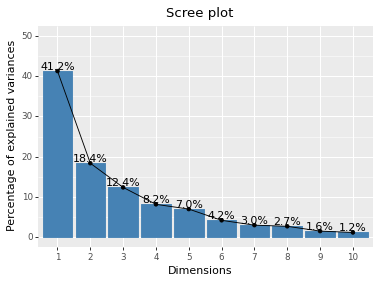

In [6]:
from scientisttools.ggplot import fviz_eig
p = fviz_eig(res_pca,add_labels=True,ylim=(0,50))
print(p)

## Graph of variables

In [7]:
from scientisttools.extractfactor import get_pca_var
var = get_pca_var(res_pca)
var.keys()

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest', 'cor', 'quanti_sup', 'quali_sup'])

In [8]:
# Coordinates
var["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,-0.850626,-0.179398,-0.301556,0.033573,-0.194444,-0.035375,-0.091336,-0.104717,-0.303064,0.044418
Long.jump,0.794181,0.280857,0.190547,-0.115390,0.233157,0.033728,-0.154331,-0.397381,-0.051590,0.029719
Shot.put,0.733913,0.085404,-0.517598,0.128468,-0.248813,0.239789,-0.009887,0.024359,0.047787,0.217452
High.jump,0.610084,-0.465214,-0.330085,0.144550,0.402700,0.284645,0.028157,0.084406,-0.112138,-0.133567
X400m,-0.701603,0.290178,-0.283533,0.430826,0.103909,0.049290,0.286106,-0.233552,0.082160,-0.034171
X110m.hurdle,-0.764125,-0.024741,-0.448887,-0.016896,0.224220,-0.002632,-0.370072,-0.008345,0.161760,-0.015630


### Correlation circle

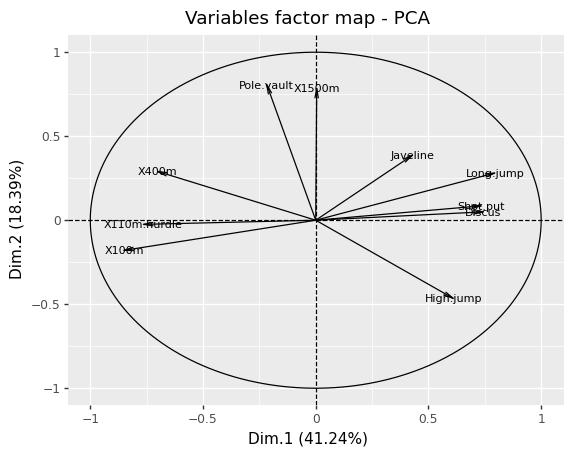

In [9]:
from scientisttools.ggplot import fviz_pca_var
p = fviz_pca_var(res_pca,color="black",quanti_sup=False)
print(p)

### Quality of representation

In [10]:
# Cos2
var["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,0.723564,0.032184,0.090936,0.001127,0.037808,0.001251,0.008342,0.010966,0.091848,0.001973
Long.jump,0.630723,0.078881,0.036308,0.013315,0.054362,0.001138,0.023818,0.157911,0.002661,0.000883
Shot.put,0.538628,0.007294,0.267907,0.016504,0.061908,0.057499,0.000098,0.000593,0.002284,0.047285
High.jump,0.372202,0.216424,0.108956,0.020895,0.162167,0.081023,0.000793,0.007124,0.012575,0.017840
X400m,0.492247,0.084203,0.080391,0.185611,0.010797,0.002430,0.081857,0.054547,0.006750,0.001168
X110m.hurdle,0.583887,0.000612,0.201500,0.000285,0.050275,0.000007,0.136953,0.000070,0.026166,0.000244


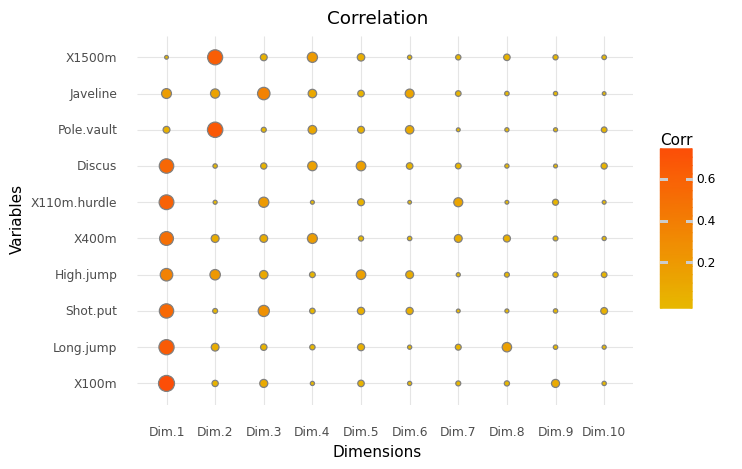

In [11]:
from scientisttools.ggplot import fviz_corrplot
cos2 = var["cos2"]
p = fviz_corrplot(cos2,method="circle",colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)


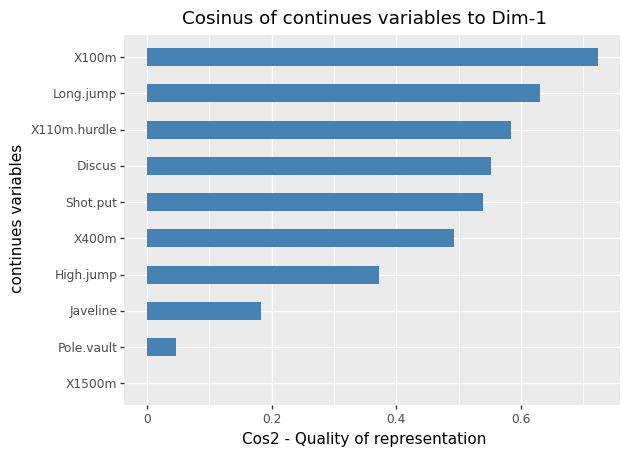

In [12]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(res_pca,choice="var",axis=0)
print(p)

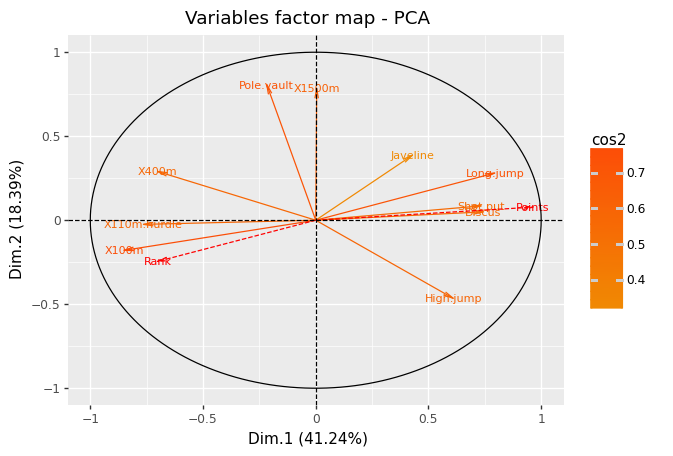

In [13]:
p = fviz_pca_var(res_pca,
                 color="cos2",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

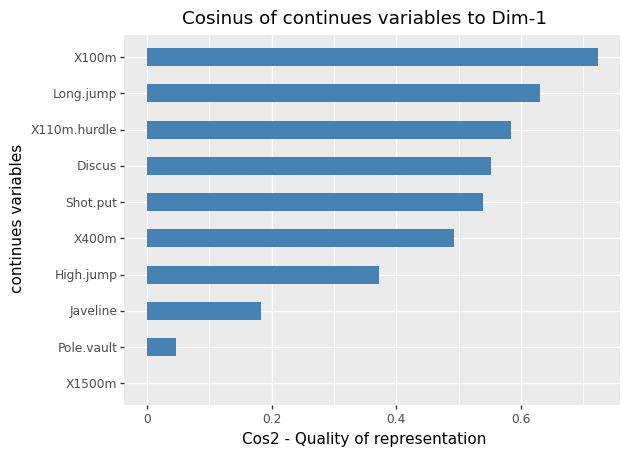

In [14]:
p = fviz_cosines(res_pca,choice="var",axis=0)
print(p)

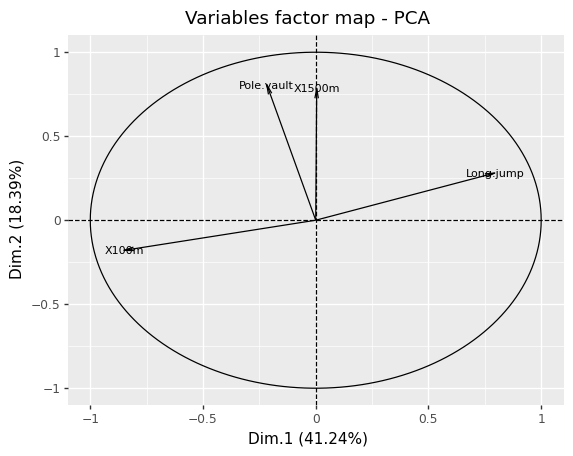

In [15]:
# Plot labels with cos2 > 0.6
p = fviz_pca_var(res_pca,
                 color="black",
                 lim_cos2=0.6,
                 quanti_sup=False)
print(p)

#### Contributions

In [16]:
# Contributions
var["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
X100m,17.544293,1.750510,7.338659,0.137552,5.389252,0.295915,2.757053,3.995204,59.174001,1.617561
Long.jump,15.293168,4.290416,2.930094,1.624859,7.748815,0.269004,7.871594,57.533222,1.714683,0.724144
Shot.put,13.060137,0.396722,21.620432,2.014073,8.824401,13.596859,0.032304,0.216185,1.471201,38.767686
High.jump,9.024811,11.771584,8.792888,2.549880,23.115504,19.159607,0.262026,2.595658,8.101552,14.626491
X400m,11.935544,4.579930,6.487636,22.650906,1.539012,0.574510,27.052747,19.873444,4.348967,0.957305
X110m.hurdle,14.157544,0.033293,16.261261,0.034837,7.166193,0.001639,45.261635,0.025370,16.857939,0.200289


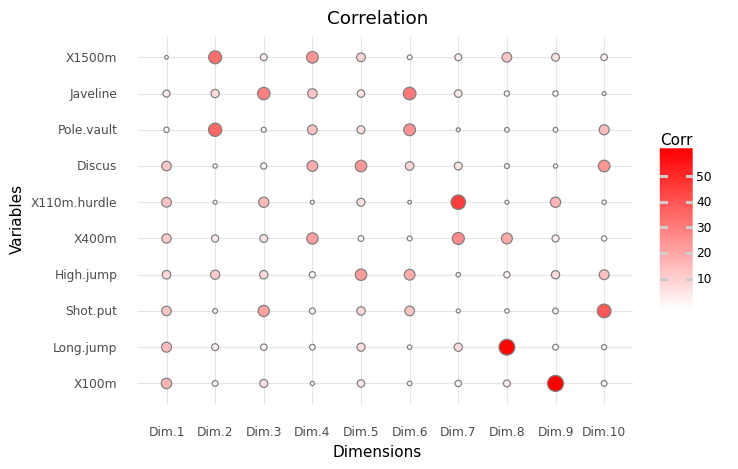

In [17]:
p = fviz_corrplot(var["contrib"])
print(p)

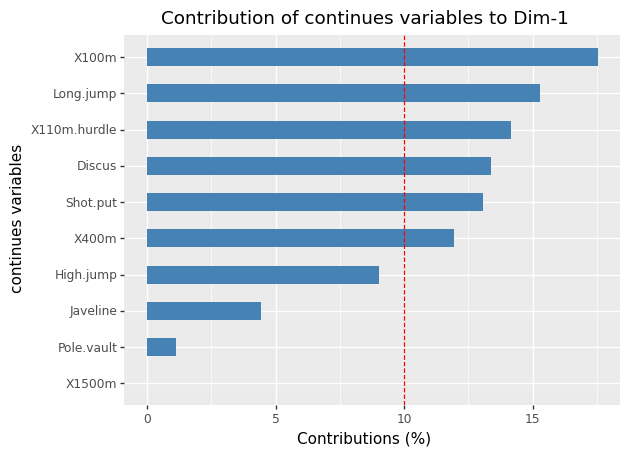

In [18]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(res_pca,choice="var",axis=0,top_contrib=10)
print(p)

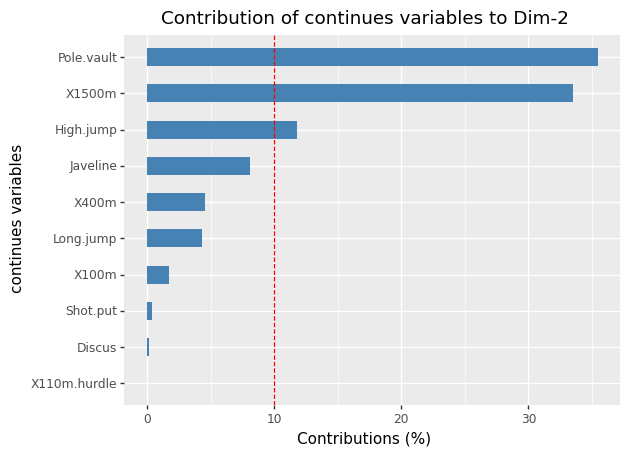

In [19]:
p = fviz_contrib(res_pca,choice="var",axis=1,top_contrib=10)
print(p)

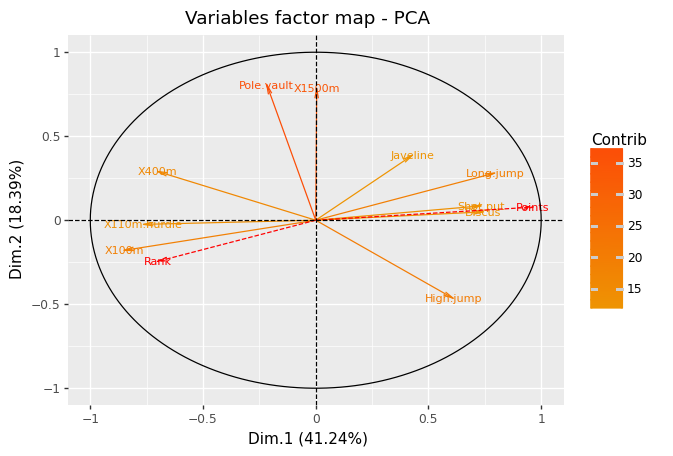

In [20]:
p = fviz_pca_var(res_pca,
                 color="contrib",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

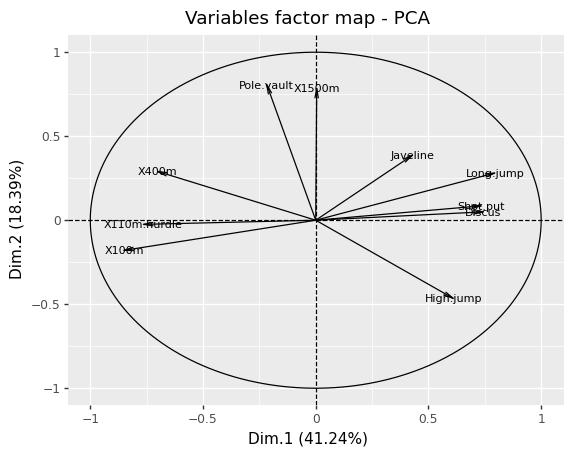

In [21]:
p = fviz_pca_var(res_pca,
                 color="black",
                 lim_contrib=25,
                 quanti_sup=False)
print(p)

### Color by a custom continuous

In [22]:
import numpy as np 
np.random.seed(123)
my_cont_var = np.random.normal(size=10)
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


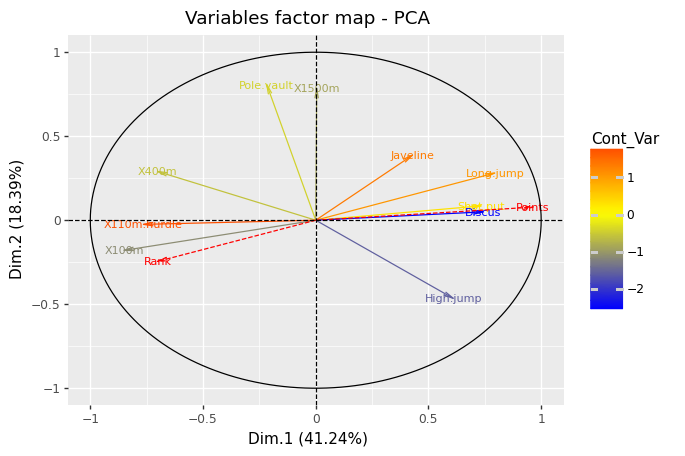

In [24]:
p = fviz_pca_var(res_pca,
                 color=my_cont_var,
                 gradient_cols = ["blue", "yellow", "red"])
print(p)

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(var["coord"])
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 2])

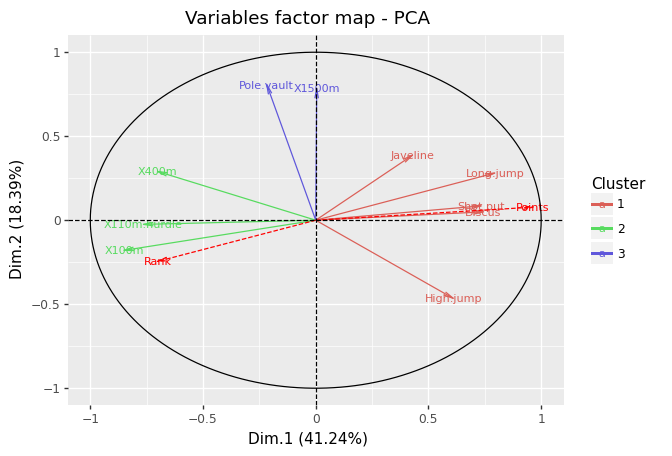

In [26]:
p = fviz_pca_var(res_pca,
                 color=kmeans,
                 gradient_cols = ["blue", "yellow", "red"],
                 legend_title="Cluster")
print(p)

In [27]:
from scientisttools.extractfactor import dimdesc
dim_desc = dimdesc(res_pca,axis=[0,1,2])
dim_desc.keys()

d:\Bureau\PythonProject\packages\scientisttools\scientisttools\extractfactor.py:1985: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\extractfactor.py:1985: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\extractfactor.py:1985: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty 

dict_keys(['Dim.1', 'Dim.2', 'Dim.3'])

In [28]:
dim_desc["Dim.1"]["quanti"]

,correlation,pvalue
Points,0.963708,1.605675e-13
Long.jump,0.794181,6.059893e-06
Discus,0.743209,4.842563e-05
Shot.put,0.733913,6.723102e-05
High.jump,0.610084,1.993677e-03
Javeline,0.428227,4.149192e-02
Rank,-0.701478,1.917657e-04
X400m,-0.701603,1.910387e-04
X110m.hurdle,-0.764125,2.195812e-05
X100m,-0.850626,2.727129e-07


In [29]:
dim_desc["Dim.1"]["quali"]

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
Competition,56.804418,38.052489,0.401157,14.067608,0.001177


In [30]:
dim_desc["Dim.2"]

,correlation,pvalue
Pole.vault,0.807451,0.000003
X1500m,0.784480,0.000009
High.jump,-0.465214,0.025294


In [31]:
dim_desc["Dim.3"]

,correlation,pvalue
X110m.hurdle,-0.448887,0.031668
Shot.put,-0.517598,0.011420
Javeline,-0.604124,0.002267


## Graph of individuals

### Result

In [32]:
from scientisttools.extractfactor import get_pca_ind
row = get_pca_ind(res_pca)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])

### Plots  : quality and contribution

In [33]:
row["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
name,,,,,,,,,,
SEBRLE,0.040294,5.971453,1.448392,0.037346,8.458941,2.313137,0.649673,0.031280,12.730999,0.039928
CLAY,0.688057,14.483925,6.753738,8.944583,4.217944,18.282929,0.681024,6.309449,0.105865,3.748675
BERNARD,1.947402,6.423411,0.141135,20.468194,0.043931,1.725207,2.481546,8.204463,0.847153,0.365852
YURKOV,0.833084,0.463273,22.451740,2.696636,1.030753,0.113731,1.585499,0.219002,0.351283,0.533935
ZSIVOCZKY,0.012324,10.121714,6.246432,0.054692,0.251510,8.620418,0.117011,0.678034,8.013325,4.524112
McMULLEN,0.015491,2.431085,2.610279,9.550559,16.294933,0.374157,3.436426,1.422605,0.326706,5.761014


Like variables, it's also possible to color individuals by their cos2 values:

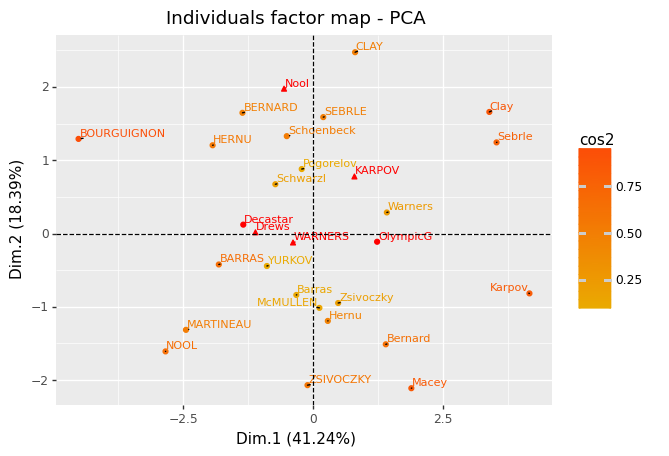

In [34]:
#
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(res_pca, color= "cos2", 
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel = True# Avoid text overlapping (slow if many points)
                 )
print(p)

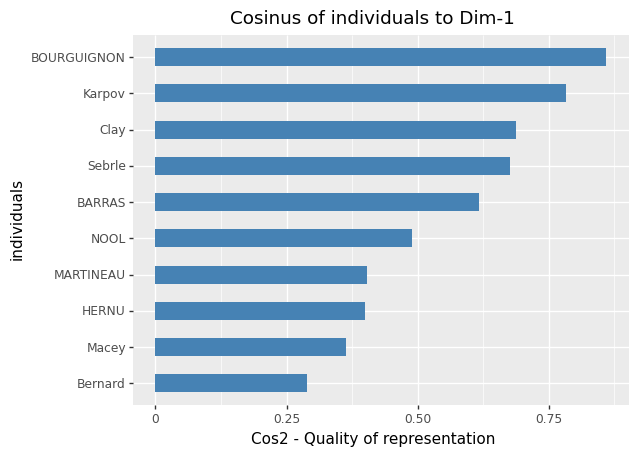

In [35]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(res_pca,choice="ind")
print(p)

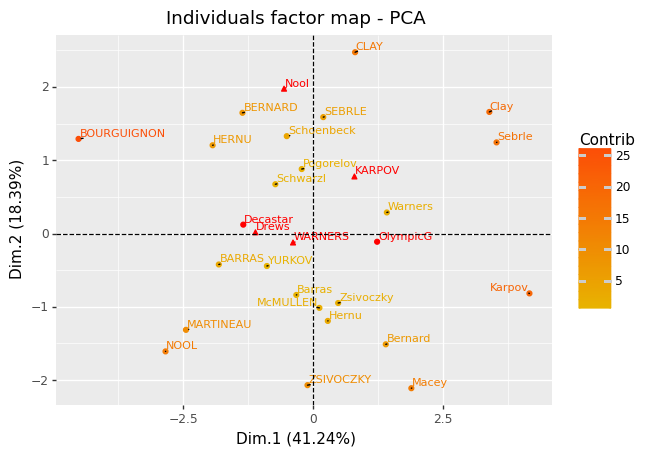

In [36]:
# 
p = fviz_pca_ind(res_pca, color= "contrib", 
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel = True# Avoid text overlapping (slow if many points)
                 )
print(p)

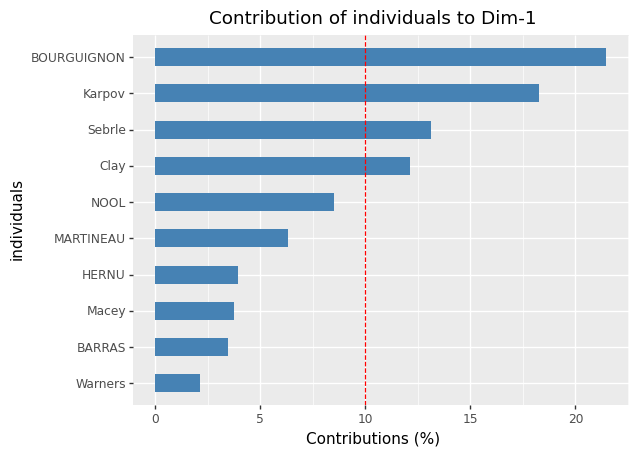

In [37]:
p = fviz_contrib(res_pca,choice="ind")
print(p)

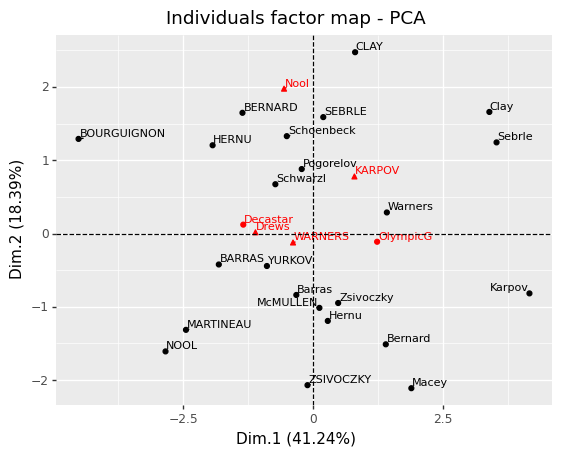

In [38]:
p = fviz_pca_ind(res_pca,
                 color="black",
                 lim_contrib=10,
                 repel=True)
print(p)

### Color by a custom continuous variable

In [39]:
np.random.seed(123)
my_cont_var = np.random.normal(size=23)
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387]


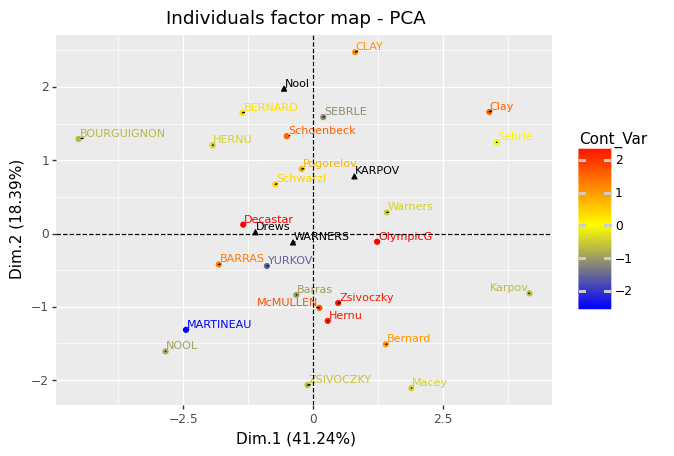

In [40]:
p = fviz_pca_ind(res_pca, color = my_cont_var,
                 gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cont_Var",
                 ind_sup=True,
                 color_sup="black",
                 repel=True)
print(p)

In [41]:
kmeans = KMeans(n_clusters=3,random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2])

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\stats\stat_ellipse.py:52: PlotnineWarning: Too few points to calculate an ellipse


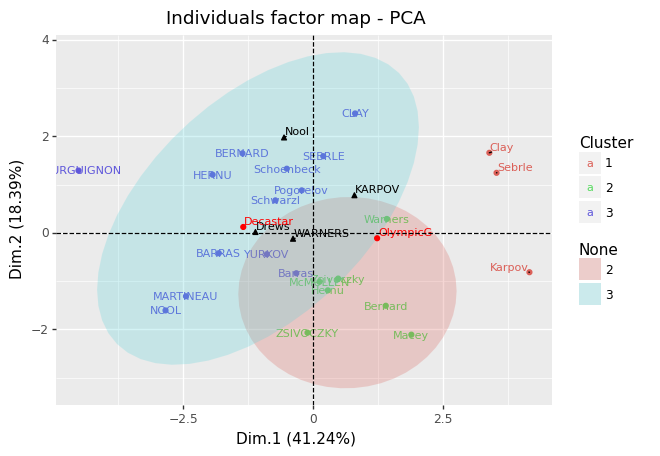

In [42]:
p = fviz_pca_ind(res_pca, color = kmeans,
                 gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cluster",
                 ind_sup=True,
                 color_sup="black",
                 add_ellipse=True,
                 repel=True)
print(p)## Quantit# # #  FcFF# 

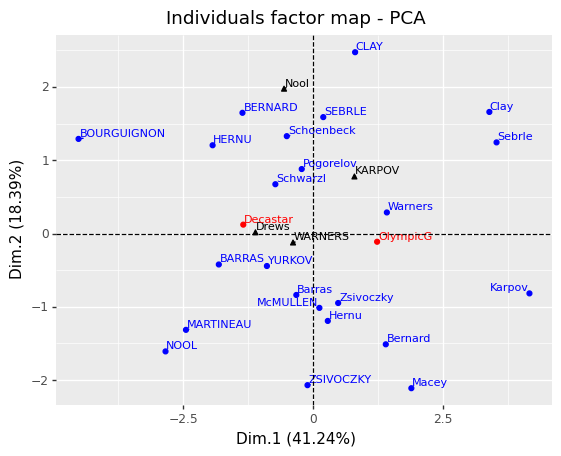

In [43]:
p = fviz_pca_ind(res_pca, habillage=None,
                 #gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cluster",
                 ind_sup=True,
                 color_sup="black",
                 add_labels=True,
                 repel=True)
print(p)

In [44]:
var_sup = var["quanti_sup"]
var_sup.keys()

dict_keys(['corr', 'coord', 'cos2', 'ftest'])

In [45]:
var_sup["coord"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Rank,-0.701478,-0.245194,0.183429,0.055752,-0.073826,0.022949,0.373385,-0.118938,0.203495,0.282892
Points,0.963708,0.077683,-0.158022,-0.166231,-0.031147,0.071696,0.025038,-0.030716,-0.002575,-0.069998


In [46]:
var_sup["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10
Rank,0.492071,0.060120,0.033646,0.003108,0.00545,0.000527,0.139417,0.014146,0.041410,0.080028
Points,0.928732,0.006035,0.024971,0.027633,0.00097,0.005140,0.000627,0.000943,0.000007,0.004900


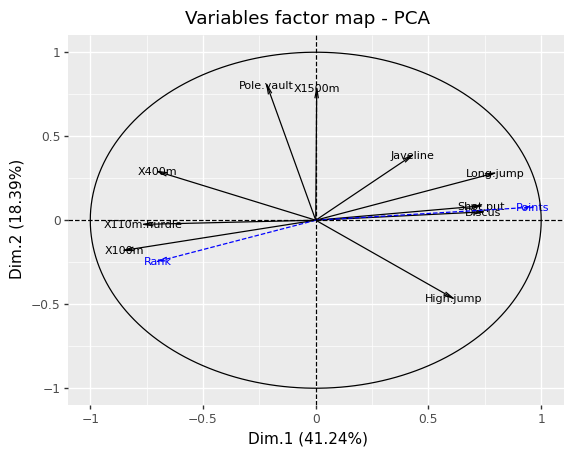

In [47]:
p = fviz_pca_var(res_pca,
                 color="black",
                 color_sup="blue")
print(p)

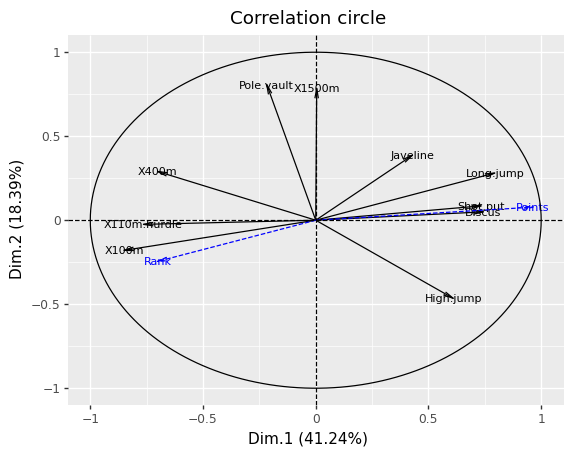

In [48]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(res_pca)
print(p)

### Reconstitution des données

In [49]:
from scientisttools.extractfactor import reconst

X = reconst(res_pca,n_components=2)
X

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
name,,,,,,,,,,
SEBRLE,10.913526,7.473883,14.761055,1.961392,49.701467,14.485381,45.582494,5.022376,61.495392,286.883716
CLAY,10.803466,7.603517,14.989972,1.950052,49.679795,14.368696,46.417030,5.135125,63.334194,291.914078
BERNARD,11.103011,7.291289,14.299982,1.915316,50.242918,14.761684,43.738791,5.071552,59.995789,287.186092
YURKOV,11.126477,7.214914,14.331568,1.996499,49.642238,14.696018,44.049439,4.755404,57.603233,275.352163
ZSIVOCZKY,11.093520,7.205262,14.480068,2.071438,49.033755,14.571028,44.785241,4.498652,56.164263,266.155825
McMULLEN,11.024121,7.299725,14.603432,2.043728,49.178078,14.521084,45.183946,4.645991,57.845896,272.136621
MARTINEAU,11.352522,6.972959,13.821336,1.980529,49.988470,14.980804,42.091899,4.669442,54.823816,270.384804
HERNU,11.191141,7.194304,14.105429,1.913375,50.344969,14.867789,43.002175,5.022142,58.803298,284.663851
BARRAS,11.239824,7.105316,14.056373,1.969537,49.961509,14.860609,42.950283,4.782591,56.690920,275.450921
